In [1]:
#==== q-1 ====
import sklearn
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
from sklearn.datasets import load_iris
sklearn.datasets.load_iris

dataset = load_iris()
X = dataset.data
y = dataset.target

In [3]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 13)

In [4]:
# Creating the SVM model
model = OneVsRestClassifier(SVC())

In [5]:
# Fitting the model with training data
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [6]:
# Making a prediction on the test set
prediction = model.predict(X_test)

In [7]:
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")

Test Set Accuracy : 80.0 %


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.57      1.00      0.73         4
           2       1.00      0.57      0.73         7

    accuracy                           0.80        15
   macro avg       0.86      0.86      0.82        15
weighted avg       0.89      0.80      0.80        15



In [17]:
#==== q-2 ====
#(a)
#import dataset
import pandas as pd
df = pd.read_csv("/content/BankNote_Authentication.csv",names = ['Test-1','Test-2','Result'])
df

,,Test-1,Test-2,Result
variance,skewness,curtosis,entropy,class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
...,...,...,...,...
0.40614,1.3492,-1.4501,-0.55949,1
-1.3887,-4.8773,6.4774,0.34179,1
-3.7503,-13.4586,17.5932,-2.7771,1
-3.5637,-8.3827,12.393,-1.2823,1


In [10]:
pip install missingno

<Axes: >

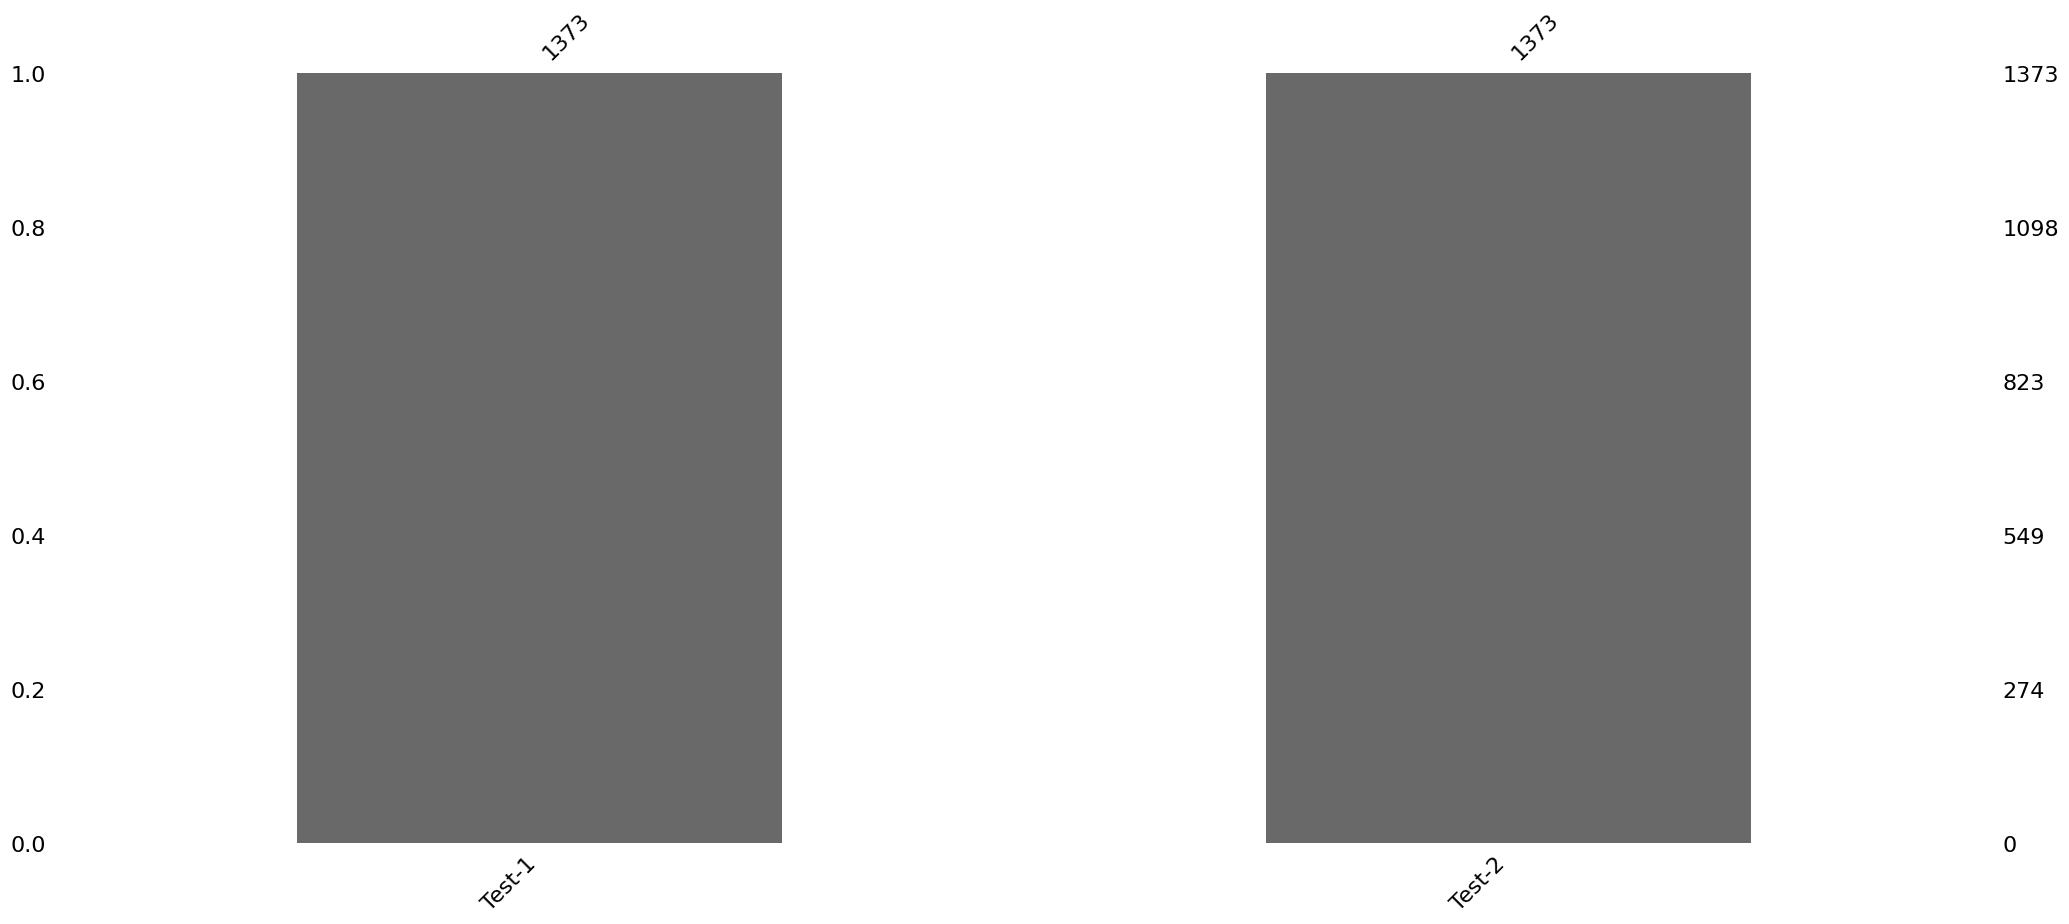

In [11]:
#checking null values
import missingno as msn
msn.bar(df.iloc[:,0:2])

<Axes: xlabel='count', ylabel='Result'>

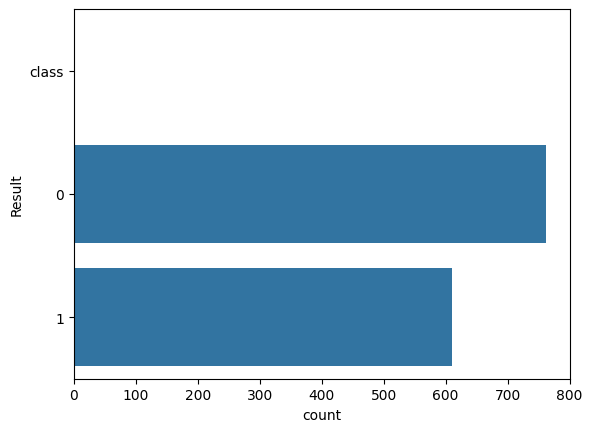

In [12]:
#checking for class balancing
import seaborn as sns
sns.countplot(y=df.iloc[:,2],data=df)

In [ ]:
#pre-processing
sns.heatmap(df.iloc[:,:2].corr(),annot=True)

In [ ]:
# splitting input and output features
from sklearn.preprocessing import StandardScaler
import numpy as np
X=df.iloc[:,0:2]
Y=df.iloc[:,2]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [ ]:
# splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)

In [ ]:
# finding optimal betas using gradient descent
n=1000 #number of iterations
alpha=10
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
    cost_gradient=np.zeros(k)
    z=X_train.dot(beta)
    predicted=1/(1+np.exp(-z))
    difference=predicted-Y_train
    for j in range(k):
        cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k):
        beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

In [ ]:
# predicting and labelling
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
    if(Y_predict[i]>=0.5):
        Y_label[i]=1

In [ ]:
# performance evaluation
TP=0
TN=0
FP=0
FN=0
Y_test=np.array(Y_test).reshape(-1,1)
for i in range(len(Y_label)):
    if(Y_test[i]==1 and Y_label[i]==1):
        TP=TP+1
    if(Y_test[i]==1 and Y_label[i]==0):
        FN=FN+1
    if(Y_test[i]==0 and Y_label[i]==1):
        FP=FP+1
    if(Y_test[i]==0 and Y_label[i]==0):
        TN=TN+1
print(TP,TN,FP,FN,'\n')
accuracy=(TP+TN)/(TP+TN+FP+FN)

#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print('positive precision =',precision_pos,'\n','positive recall = ',recall_pos,'\n','positive f1 score = ',f1_score_pos,'\n')

#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print('negative precision = ',precision_neg,'\n','negative recall = ',recall_neg,'\n','negative f1 score = ',f1_score_neg)

In [ ]:
# Macro Average:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print('macro precision = ',macro_precision,'\n','macro recall = ',macro_recall,'\n','macro f1 score = ',macro_f1_score,'\n')

# Weighted Average:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print('weighted precision = ',weighted_precision,'\n','weighted recall = ',weighted_recall,'\n','weighted f1 score = ',weighted_f1_score)

In [ ]:
# using inbuilt function
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(solver='sag')
#sag denote Stochastic Average Gradient
model=lr.fit(X_train,Y_train)
Y_label1=model.predict(X_test)
print(metrics.classification_report(Y_test,Y_label1))

In [ ]:
# (b)
n=1000 #number of iterations
alpha=10
lamda=0.2
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
    cost_gradient=np.zeros(k)
    z=X_train.dot(beta)
    predicted=1/(1+np.exp(-z))
    difference=predicted-Y_train
    for j in range(k):
        cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k):
        beta[j]=beta[j]*(1-alpha*lamda/n)-(alpha/m)*cost_gradient[j]
print(beta)

In [ ]:
# predicting and labelling
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
    if(Y_predict[i]>=0.5):
        Y_label[i]=1

In [ ]:
# performance evaluation
TP=0
TN=0
FP=0
FN=0
Y_test=np.array(Y_test).reshape(-1,1)
for i in range(len(Y_label)):
    if(Y_test[i]==1 and Y_label[i]==1):
        TP=TP+1
    if(Y_test[i]==1 and Y_label[i]==0):
        FN=FN+1
    if(Y_test[i]==0 and Y_label[i]==1):
        FP=FP+1
    if(Y_test[i]==0 and Y_label[i]==0):
        TN=TN+1
print(TP,TN,FP,FN,'\n')
accuracy=(TP+TN)/(TP+TN+FP+FN)

#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print('positive precision =',precision_pos,'\n','positive recall = ',recall_pos,'\n','positive f1 score = ',f1_score_pos,'\n')

#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print('negative precision = ',precision_neg,'\n','negative recall = ',recall_neg,'\n','negative f1 score = ',f1_score_neg)

In [ ]:
# Macro Average:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print('macro precision = ',macro_precision,'\n','macro recall = ',macro_recall,'\n','macro f1 score = ',macro_f1_score,'\n')

# Weighted Average:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print('weighted precision = ',weighted_precision,'\n','weighted recall = ',weighted_recall,'\n','weighted f1 score = ',weighted_f1_score)